# Reading and writing data

---

## Fundamentals of ETL: data extraction, transformation and loading


Applied Mathematical Modeling in Banking

---

# Table of contents

1. Comma Separated Values (CSV)

2. MS Excel (Open XML / XLSX)

2. eXtensible Markup Language (XML)

3. JavaScript Object Notation (JSON) and API 

5. Google Services

    5.1. Spreadsheets    
    5.2. Trends
    
6. SQL (SQLite sample)

7. Web-pages (HTML)

---

There are many data source types for data storing, reading. Let's review and try some of them.

# 1. CSV


`CSV` - comma separated values.

In [2]:
# lets check current working directory to write correct files path
getwd()

[1] "E:/Repos/YuRa/r-course-eng"

You can use `/` or `\\` for writing correct path in R. For example:

In [3]:
path = "d:/projects/file.csv"
path = "d:\\projects\\file.csv"

To combine path use `paste()` or `paste0()` functions

In [6]:
work_dir = getwd()
work_dir 

[1] "E:/Repos/YuRa/r-course-eng"

In [8]:
file_name = "temp_file.csv"
file_path = paste0(work_dir, "/", file_name)
file_path

[1] "E:/Repos/YuRa/r-course-eng/temp_file.csv"

In [11]:
file_path = paste(work_dir, file_name, sep = "/")
file_path

[1] "E:/Repos/YuRa/r-course-eng/temp_file.csv"

#### Sample dataset description

Information about dataset from [kaggle.com](kaggle.com).
Original file located at url: [https://www.kaggle.com/radmirzosimov/telecom-users-dataset](https://www.kaggle.com/radmirzosimov/telecom-users-dataset).

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

1. Description of the data (with the calculation of basic statistics);
2. Research of dependencies and formulation of hypotheses;
3. Building models for predicting the outflow (with justification for the choice of a particular model) 4. based on tested hypotheses and identified relationships;
5. Comparison of the quality of the obtained models.

**Fields description:**

- [x] `customerID` - customer id
- [x] `gender` - client gender (male / female)
- [x] `SeniorCitizen` - is the client retired (1, 0)
- [x] `Partner` - is the client married (Yes, No)
- [x] `tenure` - how many months a person has been a client of the company
- [x] `PhoneService` - is the telephone service connected (Yes, No)
- [x] `MultipleLines` - are multiple phone lines connected (Yes, No, No phone service)
- [x] `InternetService` - client's Internet service provider (DSL, Fiber optic, No)
- [x] `OnlineSecurity` - is the online security service connected (Yes, No, No internet service)
- [x] `OnlineBackup` - is the online backup service activated (Yes, No, No internet service)
- [x] `DeviceProtection` - does the client have equipment insurance (Yes, No, No internet service)
- [x] `TechSupport` - is the technical support service connected (Yes, No, No internet service)
- [x] `StreamingTV` - is the streaming TV service connected (Yes, No, No internet service)
- [x] `StreamingMovies` - is the streaming cinema service activated (Yes, No, No internet service)
- [x] `Contract` - type of customer contract (Month-to-month, One year, Two year)
- [x] `PaperlessBilling` - whether the client uses paperless billing (Yes, No)
- [x] `PaymentMethod` - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- [x] `MonthlyCharges` - current monthly payment
- [x] `TotalCharges` - the total amount that the client paid for the services for the entire time
- [x] `Churn - whether` there was a churn (Yes or No)


Thare are few methods for reading/writing csv in `base` package:

- [x] `read.csv()`, `write.csv` - default data separator is `,`, decimal is separator `.`.
- [x] `read.csv2()`, `write.csv2` - default data separator is `;`, decimal is separator `,`.

Before using any new function check it usage information with `help(function_name)` or `?function_name`, example: **`?read.csv`**.

You can read (current data set has NA values as example, there are no NA in original datase):

In [18]:
data <- read.csv("data/telecom_users.csv") # default reading

In [20]:
data <- read.csv("data/telecom_users.csv",
                  sep = ",", # comma not only possibel separator
                  dec = ".", # decimal separator can be different
                  na.strings = c("", "NA", "NULL")) # you can define NA values

In [22]:
str(data) # chack data structure / types/ values

'data.frame':	5986 obs. of  22 variables:
 $ X               : int  1869 4528 6344 6739 432 2215 5260 6001 1480 5137 ...
 $ customerID      : chr  "7010-BRBUU" "9688-YGXVR" "9286-DOJGF" "6994-KERXL" ...
 $ gender          : chr  "Male" "Female" "Female" "Male" ...
 $ SeniorCitizen   : int  0 0 1 0 0 0 0 0 0 1 ...
 $ Partner         : chr  "Yes" "No" "Yes" "No" ...
 $ Dependents      : chr  "Yes" "No" "No" "No" ...
 $ tenure          : int  72 44 38 4 2 70 33 1 39 55 ...
 $ PhoneService    : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ MultipleLines   : chr  "Yes" "No" "Yes" "No" ...
 $ InternetService : chr  "No" "Fiber optic" "Fiber optic" "DSL" ...
 $ OnlineSecurity  : chr  "No internet service" "No" "No" "No" ...
 $ OnlineBackup    : chr  "No internet service" "Yes" "No" "No" ...
 $ DeviceProtection: chr  "No internet service" "Yes" "No" "No" ...
 $ TechSupport     : chr  "No internet service" "No" "No" "No" ...
 $ StreamingTV     : chr  "No internet service" "Yes" "No" "No" ...
 $ Streaming

In [25]:
head(data) # top 6 rows, use n = X, for viewing top X lines

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No


In [27]:
is.data.frame(data) # if data is data.frame

[1] TRUE

In [29]:
any(is.na(data)) # if dataframe contains any NA values

[1] TRUE

In [32]:
apply(is.na(data), 2, any) #check NA by 2nd dimension - columns

X       customerID           gender    SeniorCitizen 
           FALSE            FALSE            FALSE            FALSE 
         Partner       Dependents           tenure     PhoneService 
           FALSE            FALSE            FALSE            FALSE 
   MultipleLines  InternetService   OnlineSecurity     OnlineBackup 
           FALSE            FALSE            FALSE            FALSE 
DeviceProtection      TechSupport      StreamingTV  StreamingMovies 
           FALSE            FALSE            FALSE            FALSE 
        Contract PaperlessBilling    PaymentMethod   MonthlyCharges 
           FALSE            FALSE            FALSE             TRUE 
    TotalCharges            Churn 
            TRUE            FALSE

Check `MonthlyCharges: TRUE` and `TotalCharges: TRUE`. These columns has NA-values.

Let's replace them with `mean`: 

In [35]:
data[is.na(data$TotalCharges), "TotalCharges"] <- mean(data$TotalCharges, na.rm = T)
data[is.na(data$MonthlyCharges), "MonthlyCharges"] <- mean(data$MonthlyCharges, na.rm = T)

In [37]:
any(is.na(data)) # check for NA

[1] FALSE

You can write data with `write.csv()`, `write.csv2()` from `base` package.

In [43]:
write.csv(data, file = "data/cleaned_data.csv", row.names = F)
# by default row.names = TRUE and file will contain first column with row numbers 1,2, ..., N

One more useful package is `readr`. Examples of using:

In [ ]:
`#install.packages(“readr”)
library(readr)
data <- read_csv(file = "data/telecom_users.csv", … )
data <- read_csv2(file = "data/telecom_users.csv", … )`

---

# 2. Excel (xlsx)

There are many packages to read/write MS Excel files. `xlsx` one of the most useful.

In [45]:
#install.packages("xlsx") install before use it
library(xlsx)

In [46]:
any(grepl("xlsx", installed.packages())) # check if package installed

[1] TRUE

**`?read.xlsx`** - review package functions and params

Let's read the data `telecom_users.xlsx`: 

In [48]:
data <- read.xlsx("data/telecom_users.xlsx", sheetIndex = 1)
# sheetIndex = 1 - select sheet to read, or use sheetName = "sheet1" to read by Name

In [54]:
# You can also use startRow, endRow and other params to define how mutch data read
data <- read.xlsx("data/telecom_users.xlsx", sheetIndex = 1, endRow = 100)

Let's replace `Churn` values `Yes`/`No` by `1`/`0`: 

In [56]:
head(data$Churn)

[1] "No"  "No"  "Yes" "No"  "No"  "No"

In [57]:
data$Churn <- ifelse(data$Churn == "Yes", 1, 0)

In [59]:
head(data$Churn)

[1] 0 0 1 0 0 0

Write final data to excel:

In [60]:
write.xlsx(data, file = "data/final_telecom_data.xlsx")

## Task 2.1

Download from kaggle.com and read dataset `Default_Fin.csv`: 
https://www.kaggle.com/kmldas/loan-default-prediction

_Description:_

This is a synthetic dataset created using actual data from a financial institution. The data has been modified to remove identifiable features and the numbers transformed to ensure they do not link to original source (financial institution).

This is intended to be used for academic purposes for beginners who want to practice financial analytics from a simple financial dataset

- [x] `Index` - This is the serial number or unique identifier of the loan taker
- [x] `Employed`     - This is a Boolean 1= employed 0= unemployed 
- [x] `Bank.Balance` - Bank Balance of the loan taker
- [x] `Annual.Salary` - Annual salary of the loan taker  
- [x] `Defaulted` - This is a Boolean 1= defaulted 0= not defaulted

In [ ]:
1. Check what columns has missing values
2. Count default and non-default clients / and parts of total clients in %
3. Count Employed clients
4. Count Employed Default clients
5. Average salary by Employed clients
6. Rename columns to "id", "empl", "balance", "salary", "default"

---

## Solution for Task 2.1

In [67]:
data <- read.csv("data/Default_Fin.csv")
head(data)

,Index,Employed,Bank.Balance,Annual.Salary,Defaulted.
,<int>,<int>,<dbl>,<dbl>,<int>
1,1,1,8754.36,532339.56,0
2,2,0,9806.16,145273.56,0
3,3,1,12882.60,381205.68,0
4,4,1,6351.00,428453.88,0
5,5,1,9427.92,461562.00,0
6,6,0,11035.08,89898.72,0


> 1. Check what columns has missing values

In [68]:
any(is.na(data))

[1] FALSE

> 2. Count default and non-default clients / and parts of total clients in %

In [70]:
def_count <- nrow(data[data$Defaulted. == 1, ])
no_def_count <- nrow(data[data$Defaulted. == 0, ])
def_count
no_def_count 

[1] 333

[1] 9667

In [72]:
def_count / nrow(data) * 100 # part defaults
no_def_count / nrow(data) * 100 # part non-defaults

[1] 3.33

[1] 96.67

> 3. Count Employed clients

In [73]:
empl <- data[data$Employed == 1, ]
nrow(empl)

[1] 7056

> 4. Count Employed Default clients

In [76]:
empl <- data[data$Employed == 1 & data$Defaulted. == 1, ]
nrow(empl)

[1] 206

> 5. Average salary by Employed clients

In [81]:
empl <- data[data$Employed == 1, ]
mean(empl$Annual.Salary)

[1] 480143.4

> 6. Rename columns to "id", "empl", "balance", "salary", "default":

In [82]:
colnames(data) <- c("id", "empl", "balance", "salary", "default")
head(data)

,id,empl,balance,salary,default
,<int>,<int>,<dbl>,<dbl>,<int>
1,1,1,8754.36,532339.56,0
2,2,0,9806.16,145273.56,0
3,3,1,12882.60,381205.68,0
4,4,1,6351.00,428453.88,0
5,5,1,9427.92,461562.00,0
6,6,0,11035.08,89898.72,0


# 3. XML

`XML` - eXtensible Markup Language.

For our example we will use data from `data/employes.xml`. File contains records with info:

```
<RECORDS>
   <EMPLOYEE>
      <ID>1</ID>
      <NAME>Rick</NAME>
      <SALARY>623.3</SALARY>
      <STARTDATE>1/1/2012</STARTDATE>
      <DEPT>IT</DEPT>
   </EMPLOYEE>
   ...
</RECORDS>
```

In [89]:
#install.packages("XML")
library("XML")
#install.packages("methods")
library("methods")

In [94]:
result <- xmlParse(file = "data/employes.xml")
print(result)

<?xml version="1.0"?>
<RECORDS>
  <EMPLOYEE>
    <ID>1</ID>
    <NAME>Rick</NAME>
    <SALARY>623.3</SALARY>
    <STARTDATE>1/1/2012</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>2</ID>
    <NAME>Dan</NAME>
    <SALARY>515.2</SALARY>
    <STARTDATE>9/23/2013</STARTDATE>
    <DEPT>Operations</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>3</ID>
    <NAME>Michelle</NAME>
    <SALARY>611</SALARY>
    <STARTDATE>11/15/2014</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>4</ID>
    <NAME>Ryan</NAME>
    <SALARY>729</SALARY>
    <STARTDATE>5/11/2014</STARTDATE>
    <DEPT>HR</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>5</ID>
    <NAME>Gary</NAME>
    <SALARY>843.25</SALARY>
    <STARTDATE>3/27/2015</STARTDATE>
    <DEPT>Finance</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>6</ID>
    <NAME>Nina</NAME>
    <SALARY>578</SALARY>
    <STARTDATE>5/21/2013</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>7</ID>
    <NAME>Simon</NAME>
    <SALARY>632.8<

In [98]:
rootnode <- xmlRoot(result) # reading rootnode of xml document
rootnode[[1]] # reading first record

<EMPLOYEE>
  <ID>1</ID>
  <NAME>Rick</NAME>
  <SALARY>623.3</SALARY>
  <STARTDATE>1/1/2012</STARTDATE>
  <DEPT>IT</DEPT>
</EMPLOYEE> 

In [104]:
rootnode[[1]][[2]] # reading first record in root node and second tag, its <NAME>

<NAME>Rick</NAME> 

For us the best way is to get dataframe:

In [204]:
xmldataframe <- xmlToDataFrame("data/employes.xml")
xmldataframe

ID,NAME,SALARY,STARTDATE,DEPT
<chr>,<chr>,<chr>,<chr>,<chr>
1,Rick,623.3,1/1/2012,IT
2,Dan,515.2,9/23/2013,Operations
3,Michelle,611,11/15/2014,IT
4,Ryan,729,5/11/2014,HR
5,Gary,843.25,3/27/2015,Finance
6,Nina,578,5/21/2013,IT
7,Simon,632.8,7/30/2013,Operations
8,Guru,722.5,6/17/2014,Finance


# 4. JSON and API

`JSON` (`JavaScript Object Notation`) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language Standard.

`API` is the acronym for `Application Programming Interface`, which is a software intermediary that allows two applications to talk to each other. 

One of the most popular packages for `json` is `jsonlite`.

In [8]:
#install.packages("jsonlite")
library(jsonlite)

Let's use readinginformation about BTC and USDT crypro currencies from Binance

In [9]:
market = 'BTCUSDT'
interval = '1h'
limit = 100

url <- paste0(url = "https://api.binance.com/api/v3/klines?symbol=", market ,"&interval=", interval,"&limit=", limit)
print(url) # complete request URL

[1] "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1h&limit=100"


On the next stage you need use fromJSON() function to get data.

More details about requests to Binanace at https://github.com/binance/binance-spot-api-docs/blob/master/rest-api.md#klinecandlestick-data

If you enter 'url' value at browser response is going to be like this:

```json
[
  [
    1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore.
  ]
]
```

In [11]:
data <- fromJSON(url) # get json and transform it to list()
data <- data[, 1:7] # let's left only 1:7 columns (from Open time to Close time)
head(data)

1620975600000,49056.83000000,50286.26000000,49050.00000000,49987.20000000,4177.17298000,1620979199999
1620979200000,49987.19000000,50420.17000000,49880.00000000,50365.98000000,3437.19525800,1620982799999
1620982800000,50365.97000000,50800.00000000,50140.10000000,50413.21000000,4037.60655600,1620986399999
1620986400000,50413.21000000,50767.39000000,50213.00000000,50720.34000000,3962.66302300,1620989999999
1.62099e+12,50720.34000000,50958.32000000,50478.79000000,50538.14000000,3477.03230700,1620993599999
1620993600000,50538.13000000,50624.93000000,50226.19000000,50310.83000000,3335.75637300,1620997199999


In [14]:
typeof(data) # check data type
data <- as.data.frame(data) # convert to dataframe
head(data)

[1] "list"

,V1,V2,V3,V4,V5,V6,V7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1620975600000,49056.83000000,50286.26000000,49050.00000000,49987.20000000,4177.17298000,1620979199999
2,1620979200000,49987.19000000,50420.17000000,49880.00000000,50365.98000000,3437.19525800,1620982799999
3,1620982800000,50365.97000000,50800.00000000,50140.10000000,50413.21000000,4037.60655600,1620986399999
4,1620986400000,50413.21000000,50767.39000000,50213.00000000,50720.34000000,3962.66302300,1620989999999
5,1.62099e+12,50720.34000000,50958.32000000,50478.79000000,50538.14000000,3477.03230700,1620993599999
6,1620993600000,50538.13000000,50624.93000000,50226.19000000,50310.83000000,3335.75637300,1620997199999


In [18]:
# fix columns names
colnames(data) <- c("Open_time", "Open", "High", "Low", "Close", "Volume", "Close_time")
head(data) # looks better, but columns are characters still

,Open_time,Open,High,Low,Close,Volume,Close_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1620975600000,49056.83000000,50286.26000000,49050.00000000,49987.20000000,4177.17298000,1620979199999
2,1620979200000,49987.19000000,50420.17000000,49880.00000000,50365.98000000,3437.19525800,1620982799999
3,1620982800000,50365.97000000,50800.00000000,50140.10000000,50413.21000000,4037.60655600,1620986399999
4,1620986400000,50413.21000000,50767.39000000,50213.00000000,50720.34000000,3962.66302300,1620989999999
5,1.62099e+12,50720.34000000,50958.32000000,50478.79000000,50538.14000000,3477.03230700,1620993599999
6,1620993600000,50538.13000000,50624.93000000,50226.19000000,50310.83000000,3335.75637300,1620997199999


In [20]:
is.numeric(data[,1]) # check 1st column type is numeric
is.numeric(data[,2]) # check 2nd column type is numeric

[1] FALSE

[1] FALSE

In [24]:
data <- as.data.frame(sapply(data, as.numeric)) # convert all columns to numeric
head(data) # good, its double now

,Open_time,Open,High,Low,Close,Volume,Close_time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.620976e+12,49056.83,50286.26,49050.00,49987.20,4177.173,1.620979e+12
2,1.620979e+12,49987.19,50420.17,49880.00,50365.98,3437.195,1.620983e+12
3,1.620983e+12,50365.97,50800.00,50140.10,50413.21,4037.607,1.620986e+12
4,1.620986e+12,50413.21,50767.39,50213.00,50720.34,3962.663,1.620990e+12
5,1.620990e+12,50720.34,50958.32,50478.79,50538.14,3477.032,1.620994e+12
6,1.620994e+12,50538.13,50624.93,50226.19,50310.83,3335.756,1.620997e+12


Final stage is to convert `Open_time` and `Close_time` to dates.

In [26]:
data$Open_time <- as.POSIXct(data$Open_time/1e3, origin = '1970-01-01')
data$Close_time <- as.POSIXct(data$Close_time/1e3, origin = '1970-01-01')

head(data) 

ERROR: Error in Ops.POSIXt(data$Open_time, 1000): '/' not defined for "POSIXt" objects


In [28]:
tail(data) # check last records

,Open_time,Open,High,Low,Close,Volume,Close_time
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
95,2021-05-18 08:00:00,45318.98,45509.24,45007.31,45359.99,4003.0760,2021-05-18 08:59:59
96,2021-05-18 09:00:00,45355.82,45799.29,44800.40,44898.06,4784.4768,2021-05-18 09:59:59
97,2021-05-18 10:00:00,44898.05,45244.64,44837.44,45172.70,3823.2620,2021-05-18 10:59:59
98,2021-05-18 11:00:00,45172.69,45420.00,44826.41,44925.19,3610.9346,2021-05-18 11:59:59
99,2021-05-18 12:00:00,44925.19,45133.00,44607.08,44955.35,3542.8451,2021-05-18 12:59:59
100,2021-05-18 13:00:00,44955.35,45085.00,44731.84,45084.73,925.7981,2021-05-18 13:59:59


# 5. Google Services

## 5.1. Spreadsheets

> THIS CHAPTER IS UNDER CONSTRUCTION / Working with Google Spreadsheets need account authorization.

googlesheets4 is a package to work with Google Sheets from R. 

In [30]:
#install.packages("googlesheets4")
library(googlesheets4)

You can read google documents after authentification on google service. There is sample code:

```
read_sheet("https://docs.google.com/spreadsheets/d/1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY/edit#gid=780868077")
gs4_deauth()
```

Let's read sample dataset `gapminder`. It detailed described in next paragraph.

In [31]:
gs4_example("gapminder")

Spreadsheet name: <unknown>
              ID: 1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY
          Locale: <unknown>
       Time zone: <unknown>
     # of sheets: <unknown>

Unable to get metadata for this Sheet. Error details:
Can't get Google credentials.
Are you running googlesheets4 in a non-interactive session? Consider:
  * `gs4_deauth()` to prevent the attempt to get credentials.
  * Call `gs4_auth()` directly with all necessary specifics.
See gargle's "Non-interactive auth" vignette for more details:
https://gargle.r-lib.org/articles/non-interactive-auth.html

## 5.2. Trends

**`Google Trends`** is a service for analyzing search requests by many filters like `region` (continent, country, locality), `period` (year, month), `information category` (business, education, hobby, healthcare), `information type` (news, shopping, video, images) https://trends.google.com/trends/

In [108]:
#install.packages('gtrendsR')
#install.packages('ggplot2')
library(gtrendsR) # loading package for Google Trends queries
library(ggplot2)

Let's configure out google trends query params

In [143]:
keywords = c("Bitcoin-Kurs", "FC Barcelona") # search keywords
country = c('AT') # search region from https://support.google.com/business/answer/6270107?hl=en
time = ("2021-01-01 2021-05-17") # period
channel = 'web' # search channel: google search ('news' - google news, 'images' - google images)

In [144]:
# query
trends = gtrends(keywords, gprop = channel, geo = country, time = time, tz = "UTC")

In [145]:
time_trend = trends$interest_over_time
head(time_trend)

,date,hits,keyword,geo,time,gprop,category
,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2021-01-01,7,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0
2,2021-01-02,7,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0
3,2021-01-03,7,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0
4,2021-01-04,0,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0
5,2021-01-05,6,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0
6,2021-01-06,6,Bitcoin-Kurs,AT,2021-01-01 2021-05-17,web,0


In [146]:
tail(time_trend)

,date,hits,keyword,geo,time,gprop,category
,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
263,2021-05-09,53,FC Barcelona,AT,2021-01-01 2021-05-17,web,0
264,2021-05-10,6,FC Barcelona,AT,2021-01-01 2021-05-17,web,0
265,2021-05-11,35,FC Barcelona,AT,2021-01-01 2021-05-17,web,0
266,2021-05-12,39,FC Barcelona,AT,2021-01-01 2021-05-17,web,0
267,2021-05-13,12,FC Barcelona,AT,2021-01-01 2021-05-17,web,0
268,2021-05-14,0,FC Barcelona,AT,2021-01-01 2021-05-17,web,0


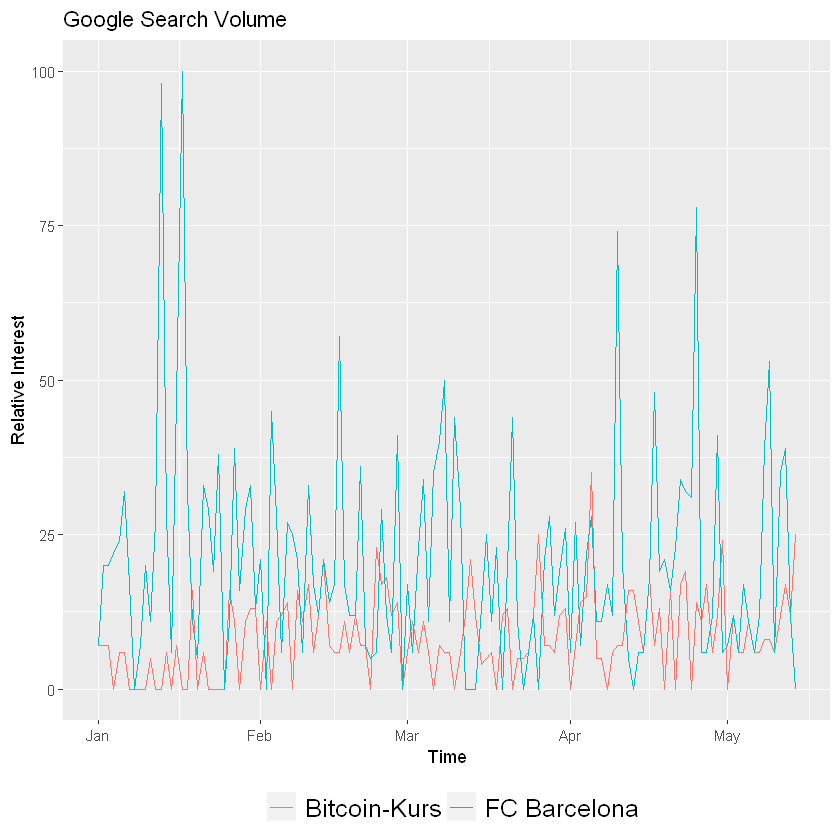

In [149]:
plot <- ggplot(data=time_trend, aes(x=date, y=hits, group=keyword, col=keyword)) +
  geom_line() +
  xlab('Time') + 
  ylab('Relative Interest') + 
  theme(legend.title = element_blank(), legend.position="bottom", legend.text=element_text(size=15)) + 
  ggtitle("Google Search Volume")  

plot

---

# 6. SQL (SQLite sample)

We are going to review working with database on SQLite, becouse it allows us not to install DB-server and start working with simple file. 

For now we will use `RSQLite` package.

In [153]:
#install.packages("RSQLite")
library(RSQLite)

In [158]:
# let's use mtcars dataset

data("mtcars") # loads the data
head(mtcars) # preview the data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [190]:
# create new db file
db_path = paste0("data/cars_.sqlite")
# create connection
conn <- dbConnect(RSQLite::SQLite(), 
                    db_path,
                    overwrite = TRUE, append = FALSE) # for lecture content only

In [191]:
# Write the mtcars dataset into a table names mtcars_data
dbWriteTable(conn, "cars_table", mtcars)
# List all the tables available in the database
dbListTables(conn)

[1] "cars_table"

In [192]:
table_data <- dbGetQuery(conn, "SELECT * FROM cars_table")
head(table_data)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
6,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [193]:
# close connection
dbDisconnect(conn)

You can write complex queries for many tables if you knowledge of SQL allows.

# 7. Web-pages (HTML)

Sometimes decision making needs scrap data from web sources and pages.

Let's try to parse data from `Wikipedia` as table. 



In [35]:
#install.packages("rvest")
library(rvest) # Parsing of HTML/XML files

Go to web page https://en.wikipedia.org/wiki/List_of_largest_banks and check it.

In [36]:
# fix URL
url <- "https://en.wikipedia.org/wiki/List_of_largest_banks"

In [37]:
# read html content of the page
page <- read_html(url)
page

{html_document}
<html class="client-nojs" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject  ...

In [38]:
# read all yables on page
tables <- html_nodes(page, "table")
tables

{xml_nodeset (5)}
[1] <table class="box-Missing_information plainlinks metadata ambox ambox-con ...
[2] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[3] <table class="wikitable sortable mw-collapsible">\n<caption>Number of ban ...
[4] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[5] <table class="wikitable sortable mw-collapsible">\n<caption>Total market  ...

For now, let's read a table of Total Assets in US Billion

In [40]:
# with pipe operator
#tables[2] %>% 
 #   html_table(fill = TRUE) %>% 
 #   as.data.frame()
#without pipe operator
assets_table <- as.data.frame(html_table(tables[2], fill = TRUE))   
head(assets_table)

,Rank,Bank.name,Total.assets.2019..US..Billion.
,<int>,<chr>,<chr>
1,1,Industrial and Commercial Bank of China,"4,324.27"
2,2,China Construction Bank,"3,653.11"
3,3,Agricultural Bank of China,"3,572.98"
4,4,Bank of China,"3,270.15"
5,5,Mitsubishi UFJ Financial Group,"2,892.97"
6,6,HSBC,"2,715.15"


Next is reading data of market capitalization table (4th):

In [41]:
capital_table <- as.data.frame(html_table(tables[4], fill = TRUE))   
head(capital_table)

,Rank,Bank.name,Market.cap.US..billion.
,<int>,<chr>,<dbl>
1,1,JPMorgan Chase,390.934
2,2,Industrial and Commercial Bank of China,345.214
3,3,Bank of America,325.331
4,4,Wells Fargo,308.013
5,5,China Construction Bank,257.399
6,6,HSBC Holdings PLC,219.270


And now let's `merge()` this two datasets:

In [42]:
merged_data <- merge(assets_table, capital_table, by = "Bank.name")
head(merged_data)

,Bank.name,Rank.x,Total.assets.2019..US..Billion.,Rank.y,Market.cap.US..billion.
,<chr>,<int>,<chr>,<int>,<dbl>
1,Agricultural Bank of China,3,"3,572.98",7,203.244
2,Australia and New Zealand Banking Group,49,661.72,32,66.448
3,Banco Bilbao Vizcaya Argentaria,42,782.16,36,60.678
4,Banco Bradesco,79,345.21,33,64.816
5,Banco Santander,16,"1,702.61",12,115.696
6,Bank of America,8,"2,434.08",3,325.331


### Task 7.1

From a page https://en.wikipedia.org/wiki/List_of_largest_banks read and `merge by country` name tables:

- [x] Number of banks in the top 100 by total assets
- [x] Total market capital (US$ billion) across the top 70 banks by country

---

## References

1. [SQLite in R. Datacamp](https://www.datacamp.com/community/tutorials/sqlite-in-r)
2. [Tidyverse googlesheets4 0.2.0](https://www.tidyverse.org/blog/2020/05/googlesheets4-0-2-0/)
3. [Telecom users dataset. Practice classification with a telco dataset.Kaggle](https://www.kaggle.com/radmirzosimov/telecom-users-dataset)
4. [Binanace spot Api Docs](https://github.com/binance/binance-spot-api-docs/blob/master/rest-api.md#klinecandlestick-data)
5. [Web Scraping in R: rvest Tutorial](https://www.datacamp.com/community/tutorials/r-web-scraping-rvest) by Arvid Kingl